In [128]:
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/Dataset"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [129]:
import cv2
import glob
import numpy as np
from skimage import feature
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

def compute_HOG(image):
  (H1, hogImage1) = feature.hog(image, orientations = 3,
                                pixels_per_cell  = (2, 2), cells_per_block  = (2, 2), transform_sqrt=True,
                                block_norm  = 'L1', visualize=True)
  return (H1, hogImage1)
new_h = 134
new_w = 70
dim = (new_w, new_h)
train_data = []
train_label = []
test_data = []
test_label = []
print("Done Initialization!")

Done Initialization!


In [130]:
for image in glob.glob(path + "/Train/pos/*.png"):
    img = cv2.imread(image, 0)
    resized_img = cv2.resize(img, dim)
    (h_vector, h_image) = compute_HOG(resized_img)
    train_data.append(h_vector)
    train_label.append(1)

print("Loaded Train Positive!\n")

Loaded Train Positive!



In [131]:
for image in glob.glob(path + "/Train/neg/*.png"):
    img = cv2.imread(image, 0)
    resized_img = cv2.resize(img, dim)
    (h_vector, h_image) = compute_HOG(resized_img)
    train_data.append(h_vector)
    train_label.append(0)

print("Loaded Train Negative!")

Loaded Train Negative!


In [132]:
for image in glob.glob(path + "/Test/pos/*.png"):
    img = cv2.imread(image, 0)
    resized_img = cv2.resize(img, dim)
    (h_vector, h_image) = compute_HOG(resized_img)
    test_data.append(h_vector)
    test_label.append(1)

print("Loaded Test Positive!")

Loaded Test Positive!


In [133]:
for image in glob.glob(path + "/Test/neg/*.png"):
    img = cv2.imread(image, 0)
    resized_img = cv2.resize(img, dim)
    (h_vector, h_image) = compute_HOG(resized_img)
    test_data.append(h_vector)
    test_label.append(0)

print("Loaded Test Negative!")

Loaded Test Negative!


In [134]:
modelSVC = LinearSVC(max_iter=5000)
modelSVC.fit(train_data, train_label)
print("SVC Training Completed!")

SVC Training Completed!


In [135]:
modelforest = RandomForestClassifier(n_estimators=300, random_state=0)
modelforest.fit(train_data, train_label)
print("Random Forest Training Completed!")

Random Forest Training Completed!


In [136]:
svm_predicted_label = modelSVC.predict(test_data)
print("Prediction completed!")
print("Comparing predicted and actual labels:")
print(svm_predicted_label[1128:1135])
print(test_label[1128:1135])

Prediction completed!
Comparing predicted and actual labels:
[0 0 1 1 0 0 0]
[1, 1, 1, 1, 0, 0, 0]


In [137]:
forest_predicted_label = modelforest.predict(test_data)
print("Prediction completed!")
print("Comparing predicted and actual labels:")
print(forest_predicted_label[1128:1135])
print(test_label[1128:1135])

Prediction completed!
Comparing predicted and actual labels:
[1 1 1 1 1 0 1]
[1, 1, 1, 1, 0, 0, 0]


In [138]:
CM = metrics.confusion_matrix(test_label, svm_predicted_label)
print("Showing Results for SVM Classifier:")
print("Accuracy = ",metrics.accuracy_score(test_label, svm_predicted_label))
print("F1_Score = ",metrics.f1_score(test_label, svm_predicted_label))
print("True Positive Rate = ", CM[1][1]/len(test_label))
print("False Positive Rate = ", CM[0][1]/len(test_label))

Showing Results for SVM Classifier:
Accuracy =  0.8666201117318436
F1_Score =  0.9098631429919773
True Positive Rate =  0.6731843575418994
False Positive Rate =  0.01606145251396648


In [139]:
CM = metrics.confusion_matrix(test_label, forest_predicted_label)
print("Showing Results for Random Forest Classifier:")
print("Accuracy = ",metrics.accuracy_score(test_label, forest_predicted_label))
print("F1_Score = ",metrics.f1_score(test_label, forest_predicted_label))
print("True Positive Rate = ", CM[1][1]/len(test_label))
print("False Positive Rate = ", CM[0][1]/len(test_label))

Showing Results for Random Forest Classifier:
Accuracy =  0.9127094972067039
F1_Score =  0.9475451112043642
True Positive Rate =  0.7884078212290503
False Positive Rate =  0.08519553072625698


In [140]:
img1 = cv2.imread(path + "/Test/pos/crop_000017a.png", 0)
img2 = cv2.imread(path + "/Test/neg/00001444.png", 0)
resized_img1 = cv2.resize(img1, dim)
resized_img2 = cv2.resize(img2, dim)
(h_vector1, h_image1) = compute_HOG(resized_img1)
(h_vector2, h_image2) = compute_HOG(resized_img2)

First SVM Actual Label is = 1 and Predicted Label is =  [1]
Second SVM Actual Label is = 0 and Predicted Label is =  [0]
First Random Forest Actual Label is = 1 and Predicted Label is =  [1]
Second Random Forest Actual Label is = 0 and Predicted Label is =  [0]


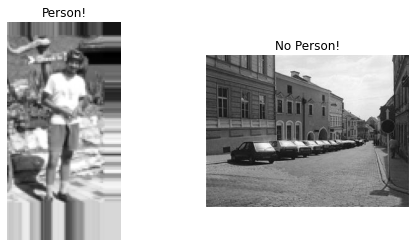

In [141]:
svm_predicted_label1 = modelSVC.predict([h_vector1])
svm_predicted_label2 = modelSVC.predict([h_vector2])
forest_predicted_label1 = modelforest.predict([h_vector1])
forest_predicted_label2 = modelforest.predict([h_vector2])
print("First SVM Actual Label is = 1 and Predicted Label is = ", svm_predicted_label1)
print("Second SVM Actual Label is = 0 and Predicted Label is = ", svm_predicted_label2)
print("First Random Forest Actual Label is = 1 and Predicted Label is = ", forest_predicted_label1)
print("Second Random Forest Actual Label is = 0 and Predicted Label is = ", forest_predicted_label2)
figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.axis('off')
ax1.imshow(img1, cmap = "gray")
ax1.set_title('Person!')
ax2.axis('off')
ax2.imshow(img2, cmap = "gray")
ax2.set_title('No Person!')
plt.show()